In [1]:
from projectlib2 import *

## Parameters

In [2]:
# Systemparamters
epsilon = 0.02
a = 0.65
b = 0.05
D = 1

# Grid
N = 200
L = 30

# Time
t_end = 80

## Functions Barkley

In [3]:
def barkley_f(u, v):
    return u*((1-u)/epsilon) * (u-((v+b)/a))

def barkley_g(u,v):
    return u-v

def barkley_du(u, v):
    return (barkley_f(u, v) + convolve(u, laplace(N, L), mode="reflect"))

def barkley_dv(u, v):
    return barkley_g(u,v)

## Start Conditions

In [4]:
x = np.linspace(-L / 2, L / 2, N, endpoint=False)
X, Y = np.meshgrid(x, x)
u = np.zeros((N,N))
v = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        if (i<N/2):
            u[j][i] = 1
        if (j>N/2):
            v[j][i] = 1

plt.imshow(u, vmin=0, vmax=1, cmap="coolwarm")
plt.colorbar()
plt.show()

### Solve Barkley

In [5]:
U, V = solve_system(barkley_du, barkley_dv, u, v, t_end, model="barkley")

### Plot Barkley Solution

In [6]:
def plot_state(i):
    return plt.imshow(U[i].reshape(N, N), cmap="coolwarm")

In [7]:
np.save("barkley_paramscan_a=65e-2_u", U)
np.save("barkley_paramscan_a=65e-2_v", V)

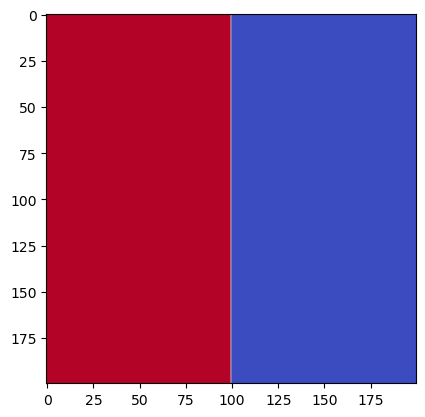

In [8]:
frame_setting=200
interval_setting=16000/frame_setting
ani1 = animation.FuncAnimation(plt.gcf(), plot_state,frames=frame_setting, interval=interval_setting, blit=False,repeat_delay=100)
HTML(ani1.to_html5_video())